<a href="https://colab.research.google.com/github/karinaismayacantik8/Generative-Adversarial-Network-KLP-4-/blob/main/collab_sederhana_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

100%|██████████| 9.91M/9.91M [00:00<00:00, 98.0MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 17.4MB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 45.2MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 9.08MB/s]


Epoch 1/20 | D loss: 0.1734 | G loss: 1.5882
Epoch 2/20 | D loss: 0.3647 | G loss: 1.5865
Epoch 3/20 | D loss: 0.5622 | G loss: 0.9494
Epoch 4/20 | D loss: 0.7313 | G loss: 0.7839
Epoch 5/20 | D loss: 0.6315 | G loss: 0.7953


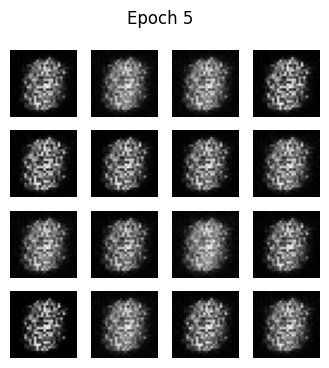

Epoch 6/20 | D loss: 0.7175 | G loss: 0.8127
Epoch 7/20 | D loss: 0.7229 | G loss: 1.0525
Epoch 8/20 | D loss: 0.4518 | G loss: 1.1082
Epoch 9/20 | D loss: 0.7910 | G loss: 0.8730
Epoch 10/20 | D loss: 0.5475 | G loss: 1.1673


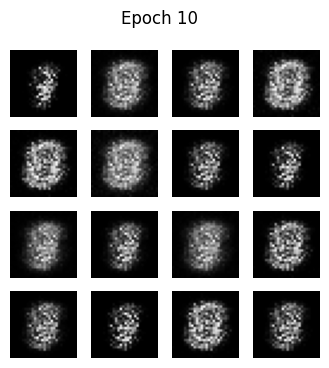

Epoch 11/20 | D loss: 0.4380 | G loss: 1.3617
Epoch 12/20 | D loss: 0.3745 | G loss: 1.3770
Epoch 13/20 | D loss: 0.4854 | G loss: 1.0388
Epoch 14/20 | D loss: 0.4965 | G loss: 1.1576
Epoch 15/20 | D loss: 0.5628 | G loss: 1.1007


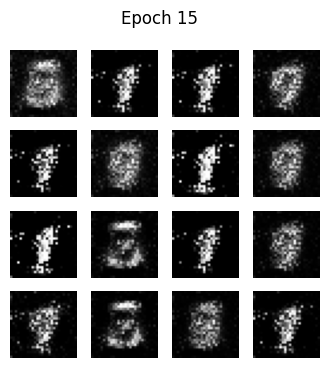

Epoch 16/20 | D loss: 0.4283 | G loss: 1.5806
Epoch 17/20 | D loss: 0.3794 | G loss: 1.3280
Epoch 18/20 | D loss: 0.5303 | G loss: 1.1846
Epoch 19/20 | D loss: 0.5945 | G loss: 1.1373
Epoch 20/20 | D loss: 0.4583 | G loss: 1.1013


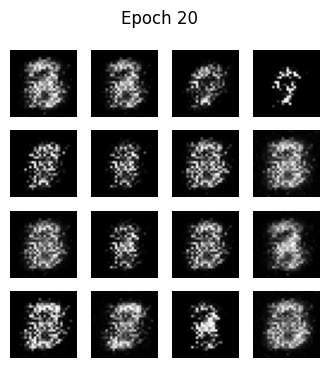

In [ ]:
# 1. Install dan import library
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# 2. Konfigurasi awal
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
latent_dim = 100
batch_size = 64
epochs = 20
lr = 0.0002

# 3. Load dataset MNIST
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])
])
dataloader = DataLoader(
    datasets.MNIST('.', download=True, transform=transform),
    batch_size=batch_size, shuffle=True
)

# 4. Generator
class Generator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(latent_dim, 256),
            nn.ReLU(),
            nn.Linear(256, 512),
            nn.ReLU(),
            nn.Linear(512, 784),
            nn.Tanh()
        )

    def forward(self, z):
        img = self.model(z)
        return img.view(-1, 1, 28, 28)

# 5. Discriminator
class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Flatten(),
            nn.Linear(784, 512),
            nn.LeakyReLU(0.2),
            nn.Linear(512, 1),
            nn.Sigmoid()
        )

    def forward(self, img):
        return self.model(img)

# 6. Inisialisasi model
generator = Generator().to(device)
discriminator = Discriminator().to(device)
loss_fn = nn.BCELoss()
optimizer_G = optim.Adam(generator.parameters(), lr=lr)
optimizer_D = optim.Adam(discriminator.parameters(), lr=lr)

# 7. Training loop
for epoch in range(epochs):
    for imgs, _ in dataloader:
        imgs = imgs.to(device)

        # Ground truths
        valid = torch.ones(imgs.size(0), 1, device=device)
        fake = torch.zeros(imgs.size(0), 1, device=device)

        # Train Generator
        optimizer_G.zero_grad()
        z = torch.randn(imgs.size(0), latent_dim, device=device)
        gen_imgs = generator(z)
        g_loss = loss_fn(discriminator(gen_imgs), valid)
        g_loss.backward()
        optimizer_G.step()

        # Train Discriminator
        optimizer_D.zero_grad()
        real_loss = loss_fn(discriminator(imgs), valid)
        fake_loss = loss_fn(discriminator(gen_imgs.detach()), fake)
        d_loss = (real_loss + fake_loss) / 2
        d_loss.backward()
        optimizer_D.step()

    print(f"Epoch {epoch+1}/{epochs} | D loss: {d_loss.item():.4f} | G loss: {g_loss.item():.4f}")

    # Tampilkan gambar hasil Generator setiap beberapa epoch
    if (epoch + 1) % 5 == 0:
        with torch.no_grad():
            sample = generator(torch.randn(16, latent_dim, device=device)).cpu()
            grid = sample.view(16, 1, 28, 28)
            plt.figure(figsize=(4, 4))
            for i in range(16):
                plt.subplot(4, 4, i+1)
                plt.imshow(grid[i][0], cmap='gray')
                plt.axis('off')
            plt.suptitle(f"Epoch {epoch+1}")
            plt.show()
